# Bagging: árbol

En este notebook clasificaremos si una instancia tiene alto poder adquisitivo mediante Bagging (con un árbol de decisión)

Se utilizarán dos preprocessings diferentes:
* Las variables utilizadas en la primera parte del trabajo práctico.
* Todas las variables sin modificación alguna

In [6]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Búsqueda
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Otros
import pandas as pd
from preprocessing import preprocessing_base_parte_1
import utils

# Plots
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df = utils.get_data()

### Modelo 1 - Preprocessing parte 1

Este Bagging será entrenado con las siguientes variables:

* **Ganancia/Pérdida declara en la bolsa argentina**: `ganancia_perdida_declarada_bolsa_argentina`
* **Edad**: `edad`
* **Rol familiar registrado**: `rol_familiar_registrado`
* **Años estudiados**: `anios_estudiados`

In [8]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
Y = df['tiene_alto_valor_adquisitivo']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, random_state=27, stratify=Y)

X_train_1, X_test_1 = preprocessing_base_parte_1(X_train_1, X_test_1)

In [9]:
params = { 'n_estimators': range(10,600,5) }
model = BaggingClassifier(n_jobs=-1, random_state=27)
    
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, cv=4, verbose=5)

In [10]:
gscv.fit(X_train_1, y_train_1)

Fitting 4 folds for each of 118 candidates, totalling 472 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 472 out of 472 | elapsed: 36.0min finished


GridSearchCV(cv=4, estimator=BaggingClassifier(n_jobs=-1, random_state=27),
             n_jobs=-1, param_grid={'n_estimators': range(10, 600, 5)},
             scoring='roc_auc', verbose=5)

In [11]:
gscv.best_estimator_

BaggingClassifier(n_estimators=580, n_jobs=-1, random_state=27)

In [12]:
gscv.best_params_

{'n_estimators': 580}

In [15]:
bagging1 = gscv.best_estimator_

In [16]:
bagging1.fit(X_train_1, y_train_1)

BaggingClassifier(n_estimators=580, n_jobs=-1, random_state=27)

In [17]:
print(classification_report(y_test_1, bagging1.predict(X_test_1), digits=4))

              precision    recall  f1-score   support

           0     0.8812    0.9287    0.9043      6181
           1     0.7289    0.6051    0.6613      1960

    accuracy                         0.8508      8141
   macro avg     0.8051    0.7669    0.7828      8141
weighted avg     0.8445    0.8508    0.8458      8141



Vemos que el modelo resulta bueno. Un accuray de 85%, precision de unos relativamente alta como así también relativamente de ceros.

Veamos ahora la matriz de confusión

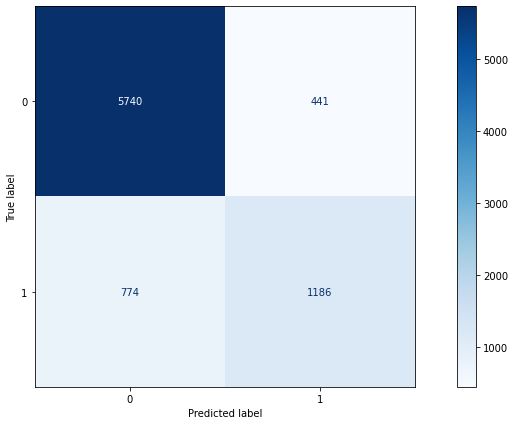

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(bagging1, X_test_1, y_test_1, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax)
plt.show()

La matriz de confusión nos muestra la alta cantidad de falsos negativos.


Veamos la curva ROC y su puntuación AUC

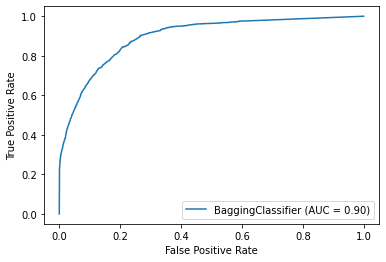

In [19]:
plot_roc_curve(bagging1, X_test_1, y_test_1)

In [20]:
print("El score de RocAUC es de: ", round(roc_auc_score(y_test_1, bagging1.predict_proba(X_test_1)[:, 1]), 4))

El score de RocAUC es de:  0.8965


Se obtuvieron buenos scores, pero nada sorprendente.

## Modelo 2 - Sin preprocesamiento

La idea de este modelo es dejar que Bagging se entrene sin sesgar las features a utilizar (que pueda utilizar absolutamente todas)

Veamos qué sucede!

In [21]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
X = pd.get_dummies(X, drop_first=True)
Y = df['tiene_alto_valor_adquisitivo']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, Y, random_state=27, stratify=Y)

In [22]:
params = { 'n_estimators': range(10,600,5) }
model = BaggingClassifier(n_jobs=-1, random_state=27)
    
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, cv=4, verbose=5)

In [23]:
gscv.fit(X_train_2, y_train_2)

Fitting 4 folds for each of 118 candidates, totalling 472 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 84.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 214.6min
[Parallel(n_jobs=-1)]: Done 472 out of 472 | elapsed: 248.5min finished


GridSearchCV(cv=4, estimator=BaggingClassifier(n_jobs=-1, random_state=27),
             n_jobs=-1, param_grid={'n_estimators': range(10, 600, 5)},
             scoring='roc_auc', verbose=5)

In [24]:
gscv.best_estimator_

BaggingClassifier(n_estimators=540, n_jobs=-1, random_state=27)

In [25]:
gscv.best_params_

{'n_estimators': 540}

In [26]:
bagging2 = gscv.best_estimator_

In [27]:
bagging2.fit(X_train_2, y_train_2)

BaggingClassifier(n_estimators=540, n_jobs=-1, random_state=27)

In [28]:
print(classification_report(y_test_2,bagging2.predict(X_test_2), digits=4))

              precision    recall  f1-score   support

           0     0.8836    0.9170    0.9000      6181
           1     0.7028    0.6189    0.6582      1960

    accuracy                         0.8452      8141
   macro avg     0.7932    0.7679    0.7791      8141
weighted avg     0.8400    0.8452    0.8418      8141



Un modelo interesante.

El recall de unos dio apenas por encima del modelo anterior, y su precision emperó apenas por debajo.

Luego, el accuracy dio 84.5%, por lo que el modelo es bueno.

Veamos la matriz de confusión

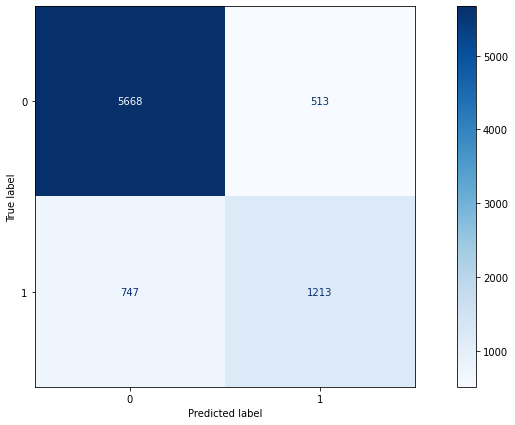

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(bagging2, X_test_2, y_test_2, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax)
plt.show()

Las conclusiones son similares a la anterior matriz de confusión.

Por último veams la curva ROC y su puntuación AUC

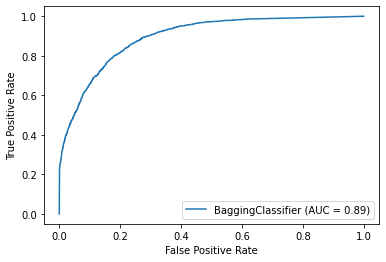

In [30]:
plot_roc_curve(bagging2, X_test_2, y_test_2)

In [31]:
print("El score de RocAUC es de: ", round(roc_auc_score(y_test_2, bagging2.predict_proba(X_test_2)[:, 1]), 4))

El score de RocAUC es de:  0.8946


Un RocAUC bastante alto, apenas por debajo del modelo anterior.

# Persistiendo los modelos

In [32]:
import pickle

In [33]:
pickle.dump(bagging1, open("Modelos/Bagging/bagging1.pickle", "wb"))
pickle.dump(bagging2, open("Modelos/Bagging/bagging2.pickle", "wb"))

FileNotFoundError: [Errno 2] No such file or directory: 'Modelos/Bagging/bagging1.pickle'

# Predicción de HoldOut

Usaremos para predecir el Bagging obtenido para el preprocessing "sin preprocessing"

In [ ]:
bagging1 = pickle.load(open("Modelos/Bagging/bagging2.pickle", "rb"))

In [37]:
def holdout():
    dfv = utils.get_data()
    Xv = dfv[dfv.columns.drop('tiene_alto_valor_adquisitivo')]

    ids, X = utils.get_holdout_data()
    
    notInHoldout=[]
    for c in Xv.columns:
        if c not in X.columns:
            notInHoldout.append(c)
    X[notInHoldout] = 0

    return ids, X

In [38]:
ids, X = holdout()

In [39]:
utils.escribir_holdout(bagging1.predict(X), "7 - Bagging", ids)

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 11.